## SHREE KRISHNA KANTH S
## 225229136
## II MSc DATA SCIENCE - "A"
## PDL LAB 06

### Step - 1
### Open fashion_minst dataset from keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

### Step -2
### Perform basic Exploratory Data Analysis (EDA):

In [3]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


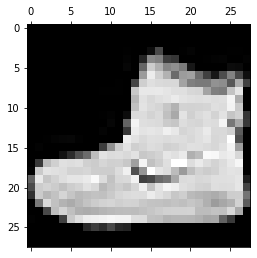

In [4]:
plt.matshow(X_train[0], cmap='gray')
plt.show()

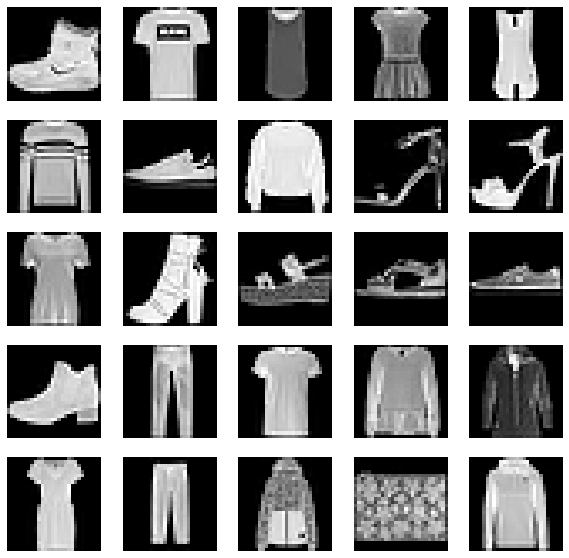

In [5]:
# Show images as a matrix
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.show()

### Step -3
### Normalize

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Step -4
### Build a simple baseline model

In [7]:
model=Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512,input_dim=1,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='mean_squared_error',
optimizer='RMSprop',
metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 27.6102 - accuracy: 0.0966
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.6101 - accuracy: 0.0960
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.6101 - accuracy: 0.0958
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.6101 - accuracy: 0.0968
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.6101 - accuracy: 0.0997
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 27.6101 - accuracy: 0.1008
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.6101 - accuracy: 0.1022
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.6101 - accuracy: 0.1027
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.6101 - accuracy: 0.1019
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - lo

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step -5
### Performance Analysis

In [9]:
# Function to build and train the model
def build_train_model(nodes, num_layers):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_layers):
        model.add(Dense(nodes, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

    start_time = time.time()
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
    training_time = time.time() - start_time

    _, test_accuracy = model.evaluate(X_test, y_test)
    return model.count_params(), model.evaluate(X_train, y_train)[1], test_accuracy, training_time

# Configurations to run
configurations = [
    (32, 1),
    (8, 1),
    (6, 1),
    (32, 1),
    (64, 1),
    (128, 1),
    (256, 1),
    (512, 1),
    (1024, 1),
    (32, 2),
    (32, 3),
    (32, 4),
    (32, 5)
]

# Lists to store results
num_parameters_list = []
training_accuracy_list = []
testing_accuracy_list = []
running_time_list = []

In [10]:
for nodes, num_layers in configurations:
    num_params, train_acc, test_acc, runtime = build_train_model(nodes, num_layers)
    num_parameters_list.append(num_params)
    training_accuracy_list.append(train_acc)
    testing_accuracy_list.append(test_acc)
    running_time_list.append(runtime)

1875/1875 [==============================] - 1s 753us/step - loss: 0.2853 - accuracy: 0.8957


Best Configuration:
Nodes: 256, Number of Layers: 1
Testing Accuracy: 0.8873999714851379


<Figure size 864x432 with 0 Axes>

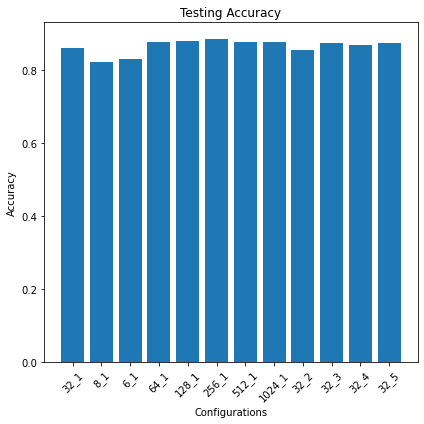

In [11]:
# Plotting the results in bar charts
x_labels = [f"{nodes}_{num_layers}" for nodes, num_layers in configurations]

plt.figure(figsize=(12, 6))

# Find the index of the maximum testing accuracy
best_config_index = np.argmax(testing_accuracy_list)

# Get the best configuration parameters
best_nodes, best_num_layers = configurations[best_config_index]

print("Best Configuration:")
print(f"Nodes: {best_nodes}, Number of Layers: {best_num_layers}")
print(f"Testing Accuracy: {testing_accuracy_list[best_config_index]}")

# Plotting the results for the best configuration
plt.figure(figsize=(6, 6))
plt.bar(x_labels, testing_accuracy_list)
plt.xticks(rotation=45)
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Configurations')
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Configuration': x_labels,
    'Parameters Learned': num_parameters_list,
    'Training Accuracy': training_accuracy_list,
    'Testing Accuracy': testing_accuracy_list,
    'Running Time (s)': running_time_list
})

# Print the DataFrame
print(results_df)

# Get the index of the best configuration
best_config_index = np.argmax(testing_accuracy_list)
best_config = results_df.iloc[best_config_index]

print("\nBest Configuration:")
print(best_config)

   Configuration  Parameters Learned  Training Accuracy  Testing Accuracy  \
0           32_1               25450           0.889283            0.8605   
1            8_1                6370           0.836633            0.8238   
2            6_1                4780           0.847967            0.8319   
3           32_1               25450           0.886967            0.8609   
4           64_1               50890           0.908783            0.8791   
5          128_1              101770           0.913867            0.8818   
6          256_1              203530           0.920433            0.8874   
7          512_1              407050           0.909200            0.8784   
8         1024_1              814090           0.913633            0.8780   
9           32_2               26506           0.882333            0.8560   
10          32_3               27562           0.903583            0.8742   
11          32_4               28618           0.896650            0.8694   

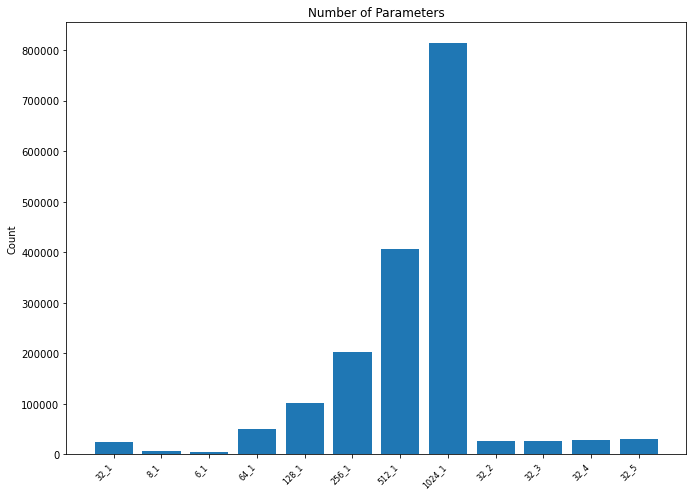

In [13]:
# Increase figure size and spacing between bars
plt.figure(figsize=(36, 7))

# Number of parameters plot
plt.subplot(1, 4, 1)
plt.bar(x_labels, num_parameters_list, width=0.8)  # Adjust the width value to control the spacing
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate labels for better visibility
plt.title('Number of Parameters')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

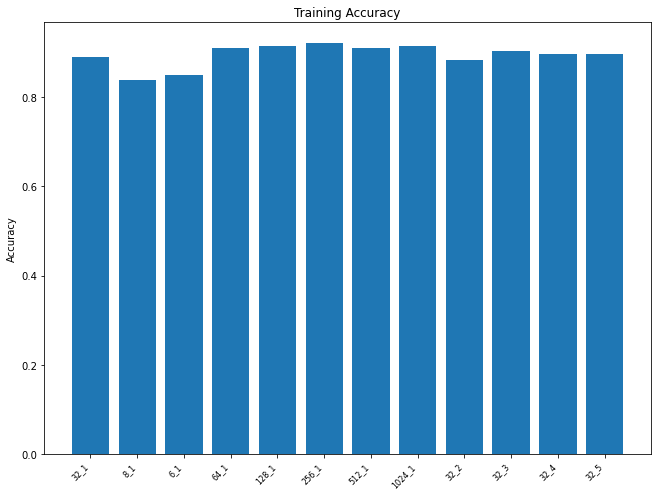

In [14]:
# Increase figure size and spacing between bars
plt.figure(figsize=(36, 7))

# Training Accuracy plot
plt.subplot(1, 4, 2)
plt.bar(x_labels, training_accuracy_list, width=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Training Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

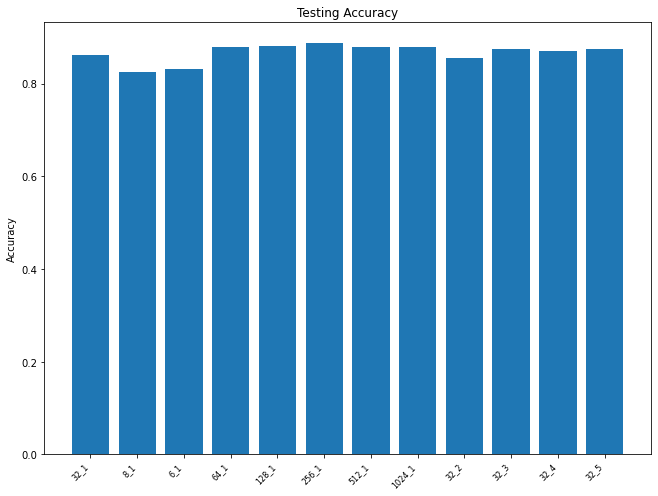

In [16]:
# Increase figure size and spacing between bars
plt.figure(figsize=(36, 7))

# Testing Accuracy plot
plt.subplot(1, 4, 3)
plt.bar(x_labels, testing_accuracy_list, width=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Testing Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

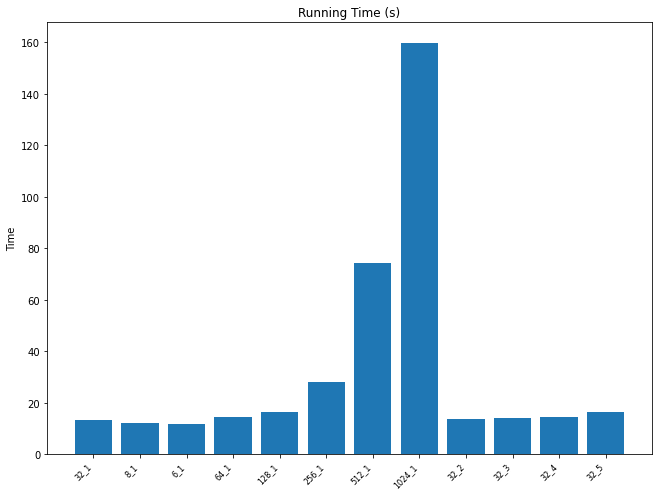

In [15]:
# Increase figure size and spacing between bars
plt.figure(figsize=(36, 7))

# Running Time plot
plt.subplot(1, 4, 4)
plt.bar(x_labels, running_time_list, width=0.8)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.title('Running Time (s)')
plt.ylabel('Time')

plt.tight_layout()
plt.show()